In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/employee_attrition_data.csv')

In [ ]:
df.head()


,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [ ]:
df.isnull().sum()

,0
Employee_ID,0
Age,0
Gender,0
Department,0
Job_Title,0
Years_at_Company,0
Satisfaction_Level,0
Average_Monthly_Hours,0
Promotion_Last_5Years,0
Salary,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop(columns='Employee_ID', inplace=True)
df.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


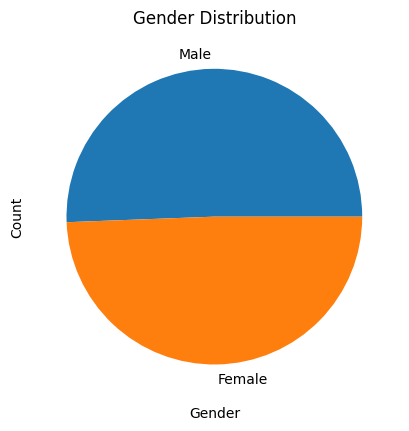

In [ ]:
import matplotlib.pyplot as plt

df['Gender'].value_counts().plot(kind='pie')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

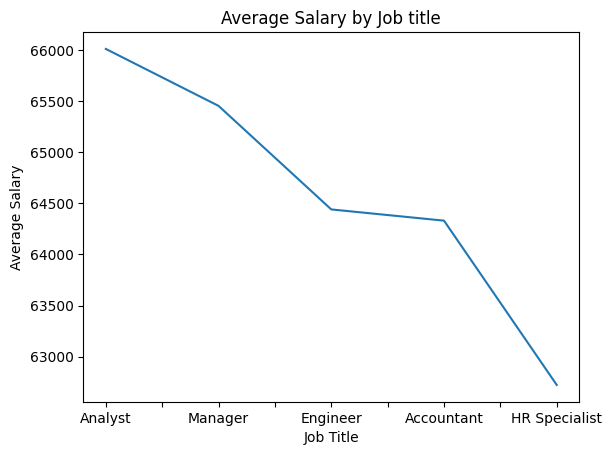

In [ ]:
df.groupby('Job_Title')['Salary'].mean().sort_values(ascending=False).plot(kind ='line')
plt.title("Average Salary by Job title")
plt.xlabel("Job Title")
plt.ylabel("Average Salary")
plt.show()

In [ ]:
df.groupby(['Department', "Promotion_Last_5Years"])['Salary'].mean().reset_index()

,Department,Promotion_Last_5Years,Salary
0,Engineering,0,65541.063636
1,Engineering,1,62424.127660
2,Finance,0,63390.145299
3,Finance,1,62041.269663
4,HR,0,63012.556701
5,HR,1,65882.861702
6,Marketing,0,65251.597826
7,Marketing,1,66018.632653
8,Sales,0,64295.846939
9,Sales,1,67838.756757


In [ ]:
X = df[['Years_at_Company','Satisfaction_Level','Average_Monthly_Hours']]
y = df['Salary']

In [ ]:
df.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X

,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours
0,9,0.586251,151
1,10,0.261161,221
2,8,0.304382,184
3,1,0.480779,242
4,10,0.636244,229
...,...,...,...
995,3,0.377435,239
996,1,0.431152,154
997,3,0.647102,206
998,2,0.304813,241


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)



In [ ]:
X_train

array([[-0.9143998 ,  0.38647326, -0.17633253],
       [-0.56100857, -0.95914995,  0.09566752],
       [-1.62118225, -1.02082305,  0.63966763],
       ...,
       [ 1.55933879,  0.90149189,  0.36766757],
       [-0.20761735,  0.03697987, -1.36633277],
       [-0.56100857,  0.55014033,  1.5236678 ]])

In [ ]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.49916511,  1.3263107 ,  0.40166758],
       [ 1.20594756, -1.58402225, -0.89033268],
       [ 1.55933879, -0.33306318, -0.0063325 ],
       [ 1.55933879, -1.65636875, -1.09433272],
       [-0.20761735, -0.47520719, -1.09433272],
       [ 0.85255633,  0.97547749, -1.5023328 ],
       [ 0.49916511, -0.34658733, -1.5023328 ],
       [ 0.49916511,  0.91007203,  1.59166781],
       [-0.20761735,  0.1687333 , -1.57033281],
       [-0.20761735,  0.58166784,  1.55766781],
       [ 0.85255633, -0.47502766,  0.57166761],
       [ 0.14577388,  1.20877527, -0.5163326 ],
       [ 0.85255633,  0.45973721, -0.55033261],
       [ 0.49916511, -0.98807837,  1.69366783],
       [ 0.49916511,  0.15919169,  0.12966753],
       [-1.62118225,  0.33837422, -1.46833279],
       [-0.9143998 , -1.59380604,  0.91166768],
       [ 1.20594756,  1.38447116,  0.97966769],
       [ 0.49916511,  0.45412516, -1.19633274],
       [-1.26779103, -0.40458339,  0.97966769],
       [ 0.49916511, -0.77768254,  1.047

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

def results(prediction):
   print("Mean absolute erro on model is {}",format(mean_absolute_error(y_test,prediction)))
   print("Root mean squared error on model is {}",format(np.sqrt(mean_squared_error(y_test,prediction))))

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictionlr = lr.predict(X_test)
results(predictionlr)

Mean absolute erro on model is {} 18474.128739359985
Root mean squared error on model is {} 21146.08966168465


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svr = SVR()

In [ ]:
param_gridsvr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'poly','rbf'],
    'degree': [2, 3, 4]
}

In [ ]:
gridsvr = GridSearchCV(svr, param_gridsvr, cv=5)
gridsvr.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'epsilon': [0.1, 0.2, 0.5],
                         'kernel': ['linear', 'poly', 'rbf']})

In [ ]:
 predictionsvr=gridsvr.predict(X_test)
results(predictionsvr)

Mean absolute erro on model is {} 18451.298447605324
Root mean squared error on model is {} 21101.9214567366


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfmodel=RandomForestRegressor()
param_gridrf={
    "n_estimators":[2,3,4,5,6],
    "max_depth":[5,10,15]
}
gridrf=GridSearchCV(rfmodel,param_gridrf,cv=5)
gridrf.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6]})

In [ ]:
gridrf.best_params_
predictionofrfr = gridrf.predict(X_test)
lr

LinearRegression()

In [ ]:
joblib.dump(lr,"model.pkl")

['model.pkl']